CS533/543 Reinforcement Learning Lab Assignment 4

Gopesh Gaba 2020MCB1236,
Gautam Bansal 2020MCB1235

1

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import math
from ray.rllib.algorithms.ppo import PPOConfig

We run the algorithm for different-different parameters and then compare their exponentially smoothened reward curves, to obtain a set of good hyper-paramters.

Ant-v4

In [ ]:
lrs = [1e-6,1e-5,5e-5,1e-4,1e-3]

for lr in lrs:
    config = (
        PPOConfig()
        .environment("Ant-v4")
    )
    config["lr"] = lr
    
    algo = config.build()
    
    for i in range(250):
        algo.train()
    path_to_checkpoint = algo.save()
    algo.stop()

In [9]:
PathList_lr = []
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_3e016_00000_0_2023-04-27_12-23-40\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_93886_00000_0_2023-04-27_12-26-03\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_0813e_00000_0_2023-04-27_13-26-35\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_12a6c_00000_0_2023-04-27_13-26-53\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_ee4fe_00000_0_2023-04-23_15-32-18\result.json')

In [10]:
lrs = []
Xs = []
Ys = []

for path in PathList_lr:
    with open(path) as f:
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            lrs.append(Dict['config']['lr'])
            break
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)

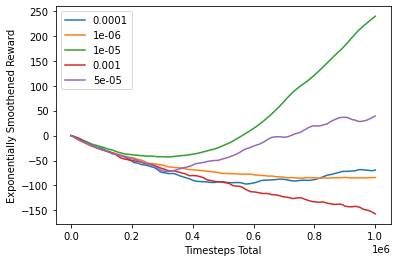

In [11]:
for i in range(len(lrs)):
    plt.plot(Xs[i],Ys[i],label = str(lrs[i]))
plt.legend()
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

As we can see from the above plt that PPO for env Ant-v4 performs the best for lr = 1e-5

In [ ]:
gammas = [0.95,0.9,0.8,0.6]

for gamma in gammas:
    config = (
        PPOConfig()
        .environment("Ant-v4")
    )
    config["lr"] = 1e-5
    config["gamma"] = gamma
    
    algo = config.build()
    
    for i in range(250):
        algo.train()
    path_to_checkpoint = algo.save()
    algo.stop()

In [12]:
PathList_gamma = []
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_4d362_00000_0_2023-04-27_14-40-06\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_4a27f_00000_0_2023-04-27_14-40-01\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_128c6_00000_0_2023-04-27_14-09-49\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_f0357_00000_0_2023-04-27_14-08-52\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_0813e_00000_0_2023-04-27_13-26-35\result.json')

In [13]:
gammas = []
Xs = []
Ys = []

for path in PathList_gamma:
    with open(path) as f:
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            print(Dict['config']['lr'])
            gammas.append(Dict['config']['gamma'])
            break
            
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)

1e-05
1e-05
1e-05
1e-05
1e-05


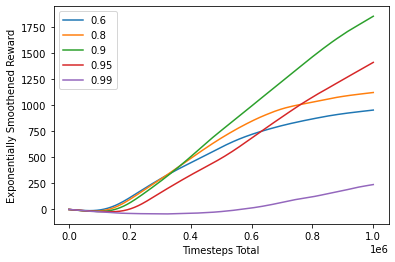

In [14]:
for i in range(len(gammas)):
    plt.plot(Xs[i],Ys[i],label = str(gammas[i]))
plt.legend()
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

As we can see from the above graph that the best gamma for learning rate = 1e-5 is 0.9

In [ ]:
config = (
    PPOConfig()
    .environment("Ant-v4")
)
config["lr"] = 1e-5
config["gamma"] = 0.9

algo = config.build()

for i in range(2500):
    algo.train()
path_to_checkpoint = algo.save()
algo.stop()

1e-05
0.9


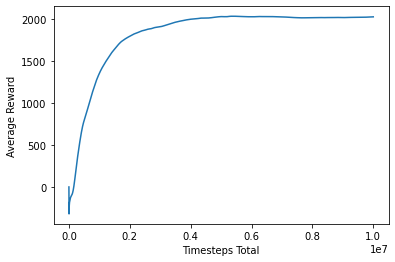

In [15]:
path = r'C:\Users\gabag\ray_results\default\PPO_Ant-v4_1b671_00000_0_2023-04-27_17-44-49\result.json'

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1


plt.plot(x,yn)
plt.xlabel('Timesteps Total')
plt.ylabel('Average Reward')
plt.show()

HalfCheetah v4

In [ ]:
lrs = [1e-6,1e-5,5e-5,1e-4]

for lr in lrs:
    config = (
        PPOConfig()
        .environment("HalfCheetah-v4")
    )
    config["lr"] = lr
    
    algo = config.build()
    
    for i in range(250):
        algo.train()
    path_to_checkpoint = algo.save()
    algo.stop()

In [16]:
PathList_lr = []
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_8aee6_00000_0_2023-04-27_16-07-43\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_88e1e_00000_0_2023-04-27_16-07-40\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_434aa_00000_0_2023-04-27_15-37-05\result.json')
PathList_lr.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_40e78_00000_0_2023-04-27_15-37-01\result.json')

In [17]:
lrs = []
Xs = []
Ys = []

for path in PathList_lr:
    with open(path) as f:
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            lrs.append(Dict['config']['lr'])
            break
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)

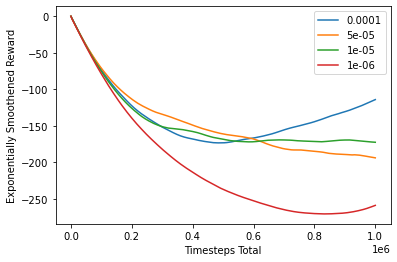

In [18]:
for i in range(len(lrs)):
    plt.plot(Xs[i],Ys[i],label = str(lrs[i]))
plt.legend()
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

As we can see from the above plt that PPO for env HalfCheetah-v4 performs the best for lr = 0.0001

In [ ]:
gammas = [0.95,0.9,0.8,0.6]

for gamma in gammas:
    config = (
        PPOConfig()
        .environment("HalfCheetah-v4")
    )
    config["lr"] = 1e-4
    config["gamma"] = gamma
    
    algo = config.build()
    
    for i in range(250):
        algo.train()
    path_to_checkpoint = algo.save()
    algo.stop()

In [19]:
PathList_gamma = []
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_e2208_00000_0_2023-04-27_17-07-26\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_c917e_00000_0_2023-04-27_17-06-44\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_17833_00000_0_2023-04-27_16-40-17\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_f8612_00000_0_2023-04-27_16-39-25\result.json')
PathList_gamma.append(r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_8aee6_00000_0_2023-04-27_16-07-43\result.json')

In [20]:
gammas = []
Xs = []
Ys = []

for path in PathList_gamma:
    with open(path) as f:
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            print(Dict['config']['lr'])
            gammas.append(Dict['config']['gamma'])
            break
            
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)

0.0001
0.0001
0.0001
0.0001
0.0001


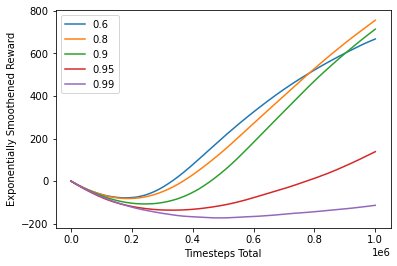

In [21]:
for i in range(len(gammas)):
    plt.plot(Xs[i],Ys[i],label = str(gammas[i]))
plt.legend()
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

As we can see from the above plot that for learning rate = 1e-4, the algorithm performs the best for gamma = 0.8. But the speed of growth of reward seems hihger for gamma = 0.9 so we shall proceed with gamma = 0.9 for the experiment with 10 million timesteps.

In [ ]:
config = (
    PPOConfig()
    .environment("HalfCheetah-v4")
)
config["lr"] = 1e-4
config["gamma"] = 0.9

algo = config.build()

for i in range(2500):
    algo.train()
path_to_checkpoint = algo.save()
algo.stop()

0.0001
0.9


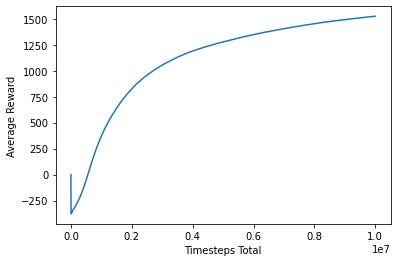

In [22]:
path = r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_06b5e_00000_0_2023-04-27_17-44-14\result.json'

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1


plt.plot(x,yn)
plt.xlabel('Timesteps Total')
plt.ylabel('Average Reward')
plt.show()

Walker 2D

In [1]:
from ray.rllib.algorithms.ppo import PPOConfig

In [2]:
lrs = [1e-6,1e-5,1e-4,1e-3]

for lr in lrs:
    config = (
        PPOConfig()
        .environment("Walker2d-v4")
    )
    config["lr"] = lr
    
    algo = config.build()
    
    for i in range(250):
        algo.train()
    path_to_checkpoint = algo.save()
    algo.stop()

2023-05-08 20:17:36,444	INFO worker.py:1553 -- Started a local Ray instance.
(RolloutWorker pid=25976) 2023-05-08 20:17:45,846	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=25976) 
(RolloutWorker pid=26288) 


2023-05-08 20:17:47,387	INFO trainable.py:172 -- Trainable.setup took 13.310 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-05-08 20:17:47,388	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=7792) 2023-05-08 20:33:03,177	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=7792) 
(RolloutWorker pid=21408) 


2023-05-08 20:33:04,731	WARNING util.py:67 -- Install gputil for GPU system monitoring.


(RolloutWorker pid=11304) 
(RolloutWorker pid=24900) 


(RolloutWorker pid=24900) 2023-05-08 20:48:51,067	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-05-08 20:48:52,552	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=20452) 2023-05-08 21:04:37,650	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=20452) 
(RolloutWorker pid=12984) 


2023-05-08 21:04:39,153	WARNING util.py:67 -- Install gputil for GPU system monitoring.


In [23]:
import json

PathList_lr = []
PathList_lr.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-08_20-17-34ad06fj25\result.json")
PathList_lr.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-08_20-32-55c_x_8_12\result.json")
PathList_lr.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-08_20-48-43n41t_34s\result.json")
PathList_lr.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-08_21-04-3018f06v0n\result.json")

In [24]:
lrs = []
Xs = []
Ys = []

for path in PathList_lr:
    with open(path) as f:
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            lrs.append(Dict['config']['lr'])
            break
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)

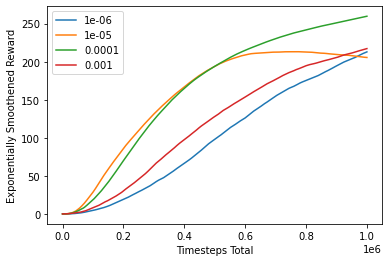

In [25]:
import matplotlib.pyplot as plt

for i in range(len(lrs)):
    plt.plot(Xs[i],Ys[i],label = str(lrs[i]))
plt.legend()
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

As we can see the best lr is 1e-4

In [16]:
gammas = [0.95,0.9,0.8,0.6]

for gamma in gammas:
    config = (
        PPOConfig()
        .environment("Walker2d-v4")
    )
    config["lr"] = 1e-4
    config["gamma"] = gamma
    
    algo = config.build()
    
    for i in range(250):
        algo.train()
    path_to_checkpoint = algo.save()
    algo.stop() 

(RolloutWorker pid=27364) 2023-05-09 12:19:55,687	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=27364) 
(RolloutWorker pid=14012) 


2023-05-09 12:19:57,390	INFO trainable.py:172 -- Trainable.setup took 10.378 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-05-09 12:19:57,392	WARNING util.py:67 -- Install gputil for GPU system monitoring.


(RolloutWorker pid=20556) 
(RolloutWorker pid=10448) 


(RolloutWorker pid=10448) 2023-05-09 12:37:39,896	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-05-09 12:37:41,520	INFO trainable.py:172 -- Trainable.setup took 10.178 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-05-09 12:37:41,522	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=15680) 2023-05-09 12:56:00,903	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=15680) 
(RolloutWorker pid=1208) 


2023-05-09 12:56:02,491	INFO trainable.py:172 -- Trainable.setup took 10.074 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-05-09 12:56:02,492	WARNING util.py:67 -- Install gputil for GPU system monitoring.


(RolloutWorker pid=17076) 
(RolloutWorker pid=26520) 


(RolloutWorker pid=26520) 2023-05-09 13:14:43,172	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-05-09 13:14:44,843	INFO trainable.py:172 -- Trainable.setup took 10.248 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-05-09 13:14:44,845	WARNING util.py:67 -- Install gputil for GPU system monitoring.


In [26]:
PathList_gamma = []
PathList_gamma.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-08_20-48-43n41t_34s\result.json")
PathList_gamma.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-08_23-49-0876l7r_xm\result.json")
PathList_gamma.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-09_00-04-46yicvwdqk\result.json")
PathList_gamma.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-09_00-20-340fsg1b2s\result.json")
PathList_gamma.append(r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-09_00-36-21qoh7sw2s\result.json")

In [27]:
gammas = []
Xs = []
Ys = []

for path in PathList_gamma:
    with open(path) as f:
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            print(Dict['config']['lr'])
            gammas.append(Dict['config']['gamma'])
            break
            
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)

0.0001
0.0001
0.0001
0.0001
0.0001


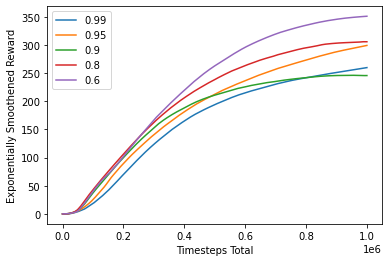

In [28]:
for i in range(len(gammas)):
    plt.plot(Xs[i],Ys[i],label = str(gammas[i]))
plt.legend()
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

So we can see that the best gamma is 0.6

In [ ]:
config = (
    PPOConfig()
    .environment("Walker2d-v4")
)
config["lr"] = 1e-4
config["gamma"] = 0.6

algo = config.build()

for i in range(2500):
    algo.train()
path_to_checkpoint = algo.save()
algo.stop()

0.0001
0.6


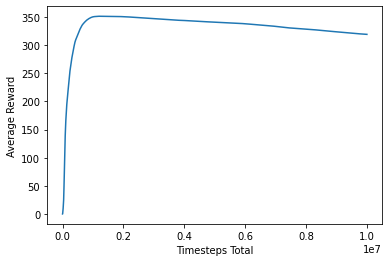

In [29]:
path = r"C:\Users\gabag\ray_results\PPO_Walker2d-v4_2023-05-09_00-57-36r9amwvk1\result.json"

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1


plt.plot(x,yn)
plt.xlabel('Timesteps Total')
plt.ylabel('Average Reward')
plt.show()

So we obtain the required curves

=======================================================================================================================

2 We take weights from the trained Ant-v4 PPO policy and transform it into weights for HalfCheetah-v4 and use these weights as initial weights to train the policy

We match similar states to similar states (both position and velocity), then using the same matching we match the actions

In [1]:
def AntPolToHalfCheetah(AntW,HalfCheetahW):
    statematch = [(0,0),(1,1),(5,2),(6,3),(8,4),(11,5),(12,6),(10,7),(13,8),(14,9),(16,10),(19,11),(20,12),(21,13),(25,16),(26,15),(24,16)]
    actionmatch = [(2,0),(3,1),(5,2),(0,3),(1,4),(7,5)]
    
    HalfCheetahW['default_policy']['default_policy/fc_1/bias'] = AntW['weights']['default_policy/fc_1/bias']
    HalfCheetahW['default_policy']['default_policy/fc_value_1/bias'] = AntW['weights']['default_policy/fc_value_1/bias']
    HalfCheetahW['default_policy']['default_policy/fc_2/kernel'] = AntW['weights']['default_policy/fc_2/kernel']
    HalfCheetahW['default_policy']['default_policy/fc_2/bias'] = AntW['weights']['default_policy/fc_2/bias']
    HalfCheetahW['default_policy']['default_policy/fc_value_2/kernel'] = AntW['weights']['default_policy/fc_value_2/kernel']
    HalfCheetahW['default_policy']['default_policy/fc_value_2/bias'] = AntW['weights']['default_policy/fc_value_2/bias']
    HalfCheetahW['default_policy']['default_policy/value_out/kernel'] = AntW['weights']['default_policy/value_out/kernel']
    HalfCheetahW['default_policy']['default_policy/value_out/bias'] = AntW['weights']['default_policy/value_out/bias']
    
    HalfCheetahW['default_policy']['default_policy/fc_1/kernel'] = np.zeros((17, 256))
    HalfCheetahW['default_policy']['default_policy/fc_value_1/kernel'] = np.zeros((17, 256))
    
    for match in statematch:
        HalfCheetahW['default_policy']['default_policy/fc_1/kernel'][match[1],:] = AntW['weights']['default_policy/fc_1/kernel'][match[0],:]
        HalfCheetahW['default_policy']['default_policy/fc_value_1/kernel'][match[1],:] = AntW['weights']['default_policy/fc_value_1/kernel'][match[0],:]
        
    for match in actionmatch:
        HalfCheetahW['default_policy']['default_policy/fc_out/kernel'][:,match[1]] = AntW['weights']['default_policy/fc_out/kernel'][:,match[0]]
        HalfCheetahW['default_policy']['default_policy/fc_out/kernel'][:,match[1]+6] = AntW['weights']['default_policy/fc_out/kernel'][:,match[0]+8]
        HalfCheetahW['default_policy']['default_policy/fc_out/bias'][match[1]] = AntW['weights']['default_policy/fc_out/bias'][match[0]]
        HalfCheetahW['default_policy']['default_policy/fc_out/bias'][match[1]+6] = AntW['weights']['default_policy/fc_out/bias'][match[0]+8]
    
    return HalfCheetahW

In [2]:
import pickle

with open(r"C:\Users\gabag\ray_results\default\PPO_Ant-v4_1b671_00000_0_2023-04-27_17-44-49\checkpoint_002500\policies\default_policy\policy_state.pkl", 'rb') as f:
    data = pickle.load(f)
#loading weights from already trained policy i.e PPO Ant-v4 trained for 10^7 timesteps

In [3]:
import numpy as np
from ray.rllib.algorithms.ppo import PPOConfig

In [4]:
config = (
    PPOConfig()
    .environment("HalfCheetah-v4")
)
config["lr"] = 0.0001
config["gamma"] = 0.9

In [5]:
algo = config.build()

pol = (algo.get_policy())

2023-05-06 10:52:10,473	INFO worker.py:1553 -- Started a local Ray instance.


(RolloutWorker pid=4772) 
(RolloutWorker pid=13636) 


(RolloutWorker pid=13636) 2023-05-06 10:52:19,336	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-05-06 10:52:20,820	INFO trainable.py:172 -- Trainable.setup took 12.902 seconds. If your trainable is slow to initialize, consider setting reuse_actors=True to reduce actor creation overheads.
2023-05-06 10:52:20,821	WARNING util.py:67 -- Install gputil for GPU system monitoring.


In [6]:
pol.set_weights(AntPolToHalfCheetah(data,algo.get_weights())['default_policy'])

In [7]:
for i in range(2500):
    algo.train()
path_to_checkpoint = algo.save()

In [ ]:
print(path_to_checkpoint)

In [10]:
algo.stop()

0.0001
0.9
0.0001
0.9


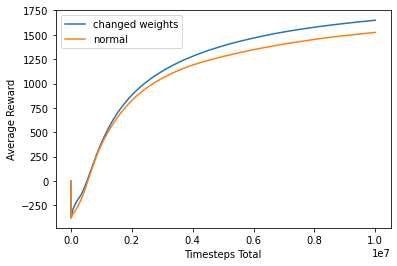

In [30]:
import json
import matplotlib.pyplot as plt

path = r"C:\Users\gabag\ray_results\PPO_HalfCheetah-v4_2023-05-05_18-20-54n657iuwm\result.json"

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1

plt.plot(x,yn,label = "changed weights")

path = r'C:\Users\gabag\ray_results\default\PPO_HalfCheetah-v4_06b5e_00000_0_2023-04-27_17-44-14\result.json'

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1

plt.plot(x,yn,label='normal')
plt.xlabel('Timesteps Total')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

We can see from the above graph that using the weights obtained in Ant-v4 PPO does inrease the average reward by like 200 by the end.

=============================================================================================================

3 

In [1]:
from ray.rllib.algorithms.ppo import PPOConfig
import numpy as np
import json
import matplotlib.pyplot as plt
import random

In [2]:
def Fedrate(Global,Privates,n_workers):
    w = (Global.get_weights())
    L = []
    Ls = []
    for item in (w['default_policy'].items()):
        L.append(item[0])
        Ls.append(item[1].shape)
    for i in range(len(L)):
        w['default_policy'][L[i]] = np.zeros(Ls[i])
    
    for private in Privates:
        wp = private.get_weights()
        for i in range(len(L)):
            w['default_policy'][L[i]] +=wp['default_policy'][L[i]]/n_workers
        
    pol = Global.get_policy()
    pol.set_weights(w['default_policy'])
    
    for private in Privates:
        polp = private.get_policy()
        polp.set_weights(w['default_policy'])
        
    return Global,Privates

In [5]:
def FedRLPPOant(n_workers,lr,gamma):
    config = (
    PPOConfig()
    .environment("Ant-v4")
    )
    config["lr"] = lr
    config["gamma"] = gamma
    config["num_rollout_workers"] = 1
    
    Global = config.build()
    Privates = []
    for i in range(n_workers):
        config = (
        PPOConfig()
        .environment("Ant-v4")
        )
        config["lr"] = lr
        config["gamma"] = gamma
        config["num_rollout_workers"] = 1
        config["env_config"]["reset_noise_scale"] = 0.05 + 0.1*random.random()
        config["env_config"]["ctrl_cost_weight"] = 0.45 + 0.1*random.random()
        config["env_config"]["contact_cost_weight"] = -1 + 2*random.random()
        Privates.append(config.build())
        
    for i in range(100):
        for algo in Privates:
            algo.train()
        if i%5==4:
            Global,Privates = Fedrate(Global,Privates,n_workers)
    for i in range(100):
        Global.train()
    for private in Privates:
        print(private.save())
        private.stop()
    print(Global.save())
    Global.stop()

In [6]:
def FedRLPPOhc(n_workers,lr,gamma):
    config = (
    PPOConfig()
    .environment("HalfCheetah-v4")
    )
    config["lr"] = lr
    config["gamma"] = gamma
    config["num_rollout_workers"] = 1
    
    Global = config.build()
    Privates = []
    for i in range(n_workers):
        config = (
        PPOConfig()
        .environment("HalfCheetah-v4")
        )
        config["lr"] = lr
        config["gamma"] = gamma
        config["num_rollout_workers"] = 1
        config["env_config"]["reset_noise_scale"] = 0.05 + 0.1*random.random()
        config["env_config"]["ctrl_cost_weight"] = 0.05 + 0.1*random.random()
        
        Privates.append(config.build())
        
    for i in range(100):
        for algo in Privates:
            algo.train()
        if i%5==4:
            Global,Privates = Fedrate(Global,Privates,n_workers)
    for i in range(100):
        Global.train()
    for private in Privates:
        print(private.save())
        private.stop()
    print(Global.save())
    Global.stop()

In [7]:
FedRLPPOant(3,1e-5,0.9)

(RolloutWorker pid=1184) 2023-05-10 20:22:05,533	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=1184) 


2023-05-10 20:22:06,985	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=19892) 2023-05-10 20:22:14,061	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=19892) 


2023-05-10 20:22:15,534	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=5500) 2023-05-10 20:22:22,643	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=5500) 


2023-05-10 20:22:24,116	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=29104) 2023-05-10 20:22:31,203	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=29104) 


2023-05-10 20:22:32,680	WARNING util.py:67 -- Install gputil for GPU system monitoring.


C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-22-06nffl8q2x\checkpoint_000100
C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-22-158q9shfto\checkpoint_000100
C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-22-24456o_l1k\checkpoint_000100
C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-21-58hhjk24lf\checkpoint_000100


Private

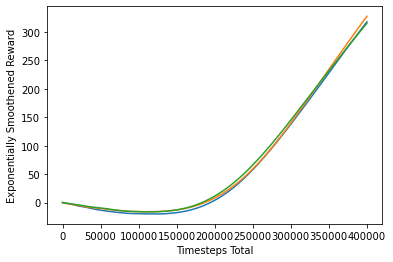

In [34]:
workerpaths = []
workerpaths.append(r"C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-22-06nffl8q2x/result.json")
workerpaths.append(r"C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-22-158q9shfto/result.json")
workerpaths.append(r"C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-22-24456o_l1k/result.json")

Xs = []
Ys = []

for path in workerpaths:
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)
    
for i in range(len(Xs)):
    plt.plot(Xs[i],Ys[i])
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

Global

1e-05
0.9


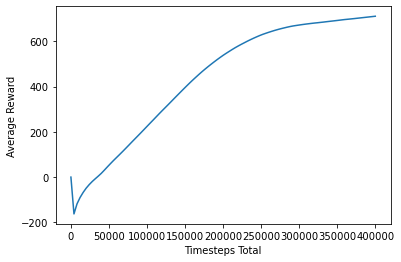

In [37]:
path = r"C:\Users\gabag/ray_results\PPO_Ant-v4_2023-05-10_20-21-58hhjk24lf\result.json"

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1

plt.plot(x,yn)
plt.xlabel('Timesteps Total')
plt.ylabel('Average Reward')
plt.show()

In [8]:
FedRLPPOhc(3,1e-4,0.9)

(RolloutWorker pid=31068) 


(RolloutWorker pid=31068) 2023-05-10 21:05:44,392	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-05-10 21:05:45,854	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=38104) 2023-05-10 21:05:53,091	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=38104) 


2023-05-10 21:05:54,544	WARNING util.py:67 -- Install gputil for GPU system monitoring.


(RolloutWorker pid=28232) 


(RolloutWorker pid=28232) 2023-05-10 21:06:01,699	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.
2023-05-10 21:06:03,354	WARNING util.py:67 -- Install gputil for GPU system monitoring.
(RolloutWorker pid=24148) 2023-05-10 21:06:10,504	WARNING env.py:166 -- Your env reset() method appears to take 'seed' or 'return_info' arguments. Note that these are not yet supported in RLlib. Seeding will take place using 'env.seed()' and the info dict will not be returned from reset.


(RolloutWorker pid=24148) 


2023-05-10 21:06:11,967	WARNING util.py:67 -- Install gputil for GPU system monitoring.


C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-05-45ztusf44x\checkpoint_000100
C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-05-544c4o4epv\checkpoint_000100
C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-06-034r31wd5o\checkpoint_000100
C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-05-36103rfxdq\checkpoint_000100


Private

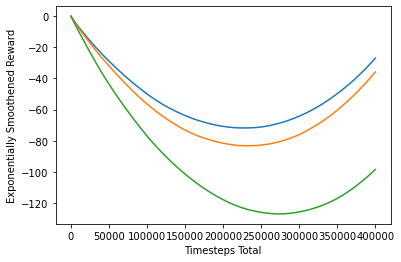

In [36]:
workerpaths = []
workerpaths.append(r"C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-05-45ztusf44x/result.json")
workerpaths.append(r"C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-05-544c4o4epv/result.json")
workerpaths.append(r"C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-06-034r31wd5o/result.json")

Xs = []
Ys = []

for path in workerpaths:
    x = []
    y = []
    ym = []
    ym.append(0)
    x.append(0)
    with open(path) as f:
        i = 0
        for jsonObj in f:
            Dict = json.loads(jsonObj)
            x.append(Dict['timesteps_total'])
            y.append(Dict['episode_reward_mean'])
            ym.append(0.01*y[i]+0.99*ym[i])
            i+=1
    Xs.append(x)
    Ys.append(ym)
    
for i in range(len(Xs)):
    plt.plot(Xs[i],Ys[i])
plt.xlabel('Timesteps Total')
plt.ylabel('Exponentially Smoothened Reward')
plt.show()

Global

0.0001
0.9


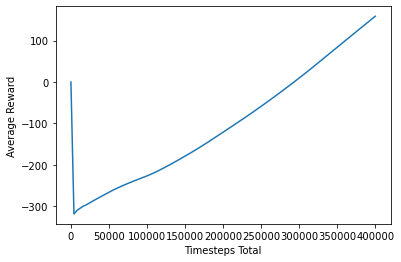

In [38]:
path = r"C:\Users\gabag/ray_results\PPO_HalfCheetah-v4_2023-05-10_21-05-36103rfxdq\result.json"

with open(path) as f:
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        print(Dict['config']['lr'])
        print(Dict['config']['gamma'])
        break
        
x = []
y = []
ym = []
yn = []
su = 0
yn.append(0)
ym.append(0)
x.append(0)
with open(path) as f:
    i = 0
    for jsonObj in f:
        Dict = json.loads(jsonObj)
        x.append(Dict['timesteps_total'])
        y.append(Dict['episode_reward_mean'])
        su+=y[i]
        yn.append(su/(i+1))
        ym.append(0.01*y[i]+0.99*ym[i])
        i+=1

plt.plot(x,yn)
plt.xlabel('Timesteps Total')
plt.ylabel('Average Reward')
plt.show()